In [1]:
import arviz as az
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
    
def survey(students: int, drugged_students: float):
    
    answers = []
    for student in range(students):
        if np.random.random() < 0.5:
            if np.random.random() < drugged_students:
                answers.append(1)
            else:
                answers.append(0)
        else:
            if np.random.random() < 0.5:
                answers.append(0)
            else:
                answers.append(1)
                
    return sum(filter(lambda answer: answer == 1, answers)) / len(answers)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
print(survey(100, 0.1))

0.3000269


In [3]:
print(survey(100, 0.5))

0.5002548


In [4]:
print(survey(100, 0.9))

0.69989


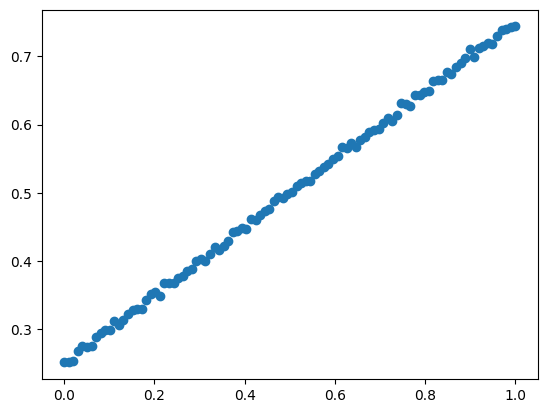

In [10]:
list_of_drugged_students = np.linspace(0, 1, 100)
list_of_survey_answers = []

for test in list_of_drugged_students:
    list_of_survey_answers.append(survey(10000,test))

plt.scatter(list_of_drugged_students, list_of_survey_answers)
plt.show()

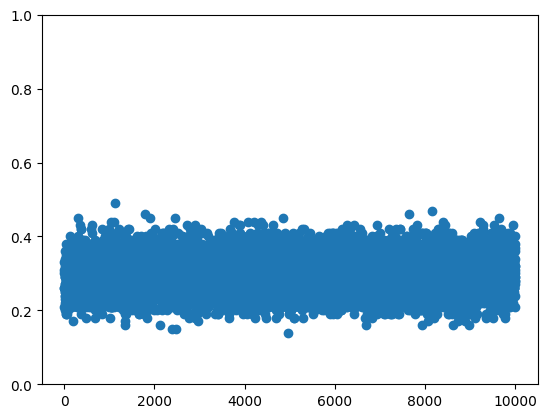

In [15]:
repeated_surveys = []
number_of_surveys = 10000

for idx in range(number_of_surveys):
    repeated_surveys.append(survey(100, 0.1))
    
plt.scatter(range(number_of_surveys), repeated_surveys)
plt.ylim(0, 1)
plt.show()

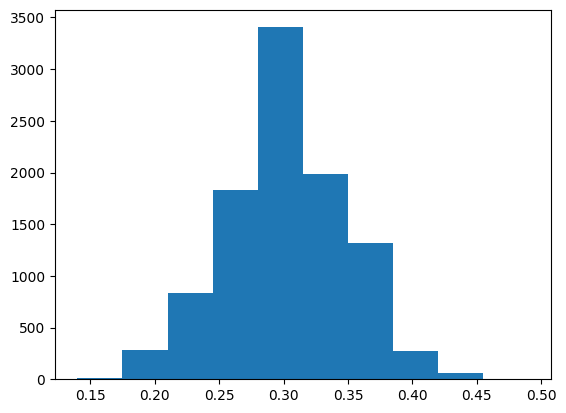

In [17]:
counts, bins = np.histogram(repeated_surveys)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()